<a href="https://colab.research.google.com/github/hasanjay/hasanjay/blob/main/BRISK%20through%20the%20Brute%20Force%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

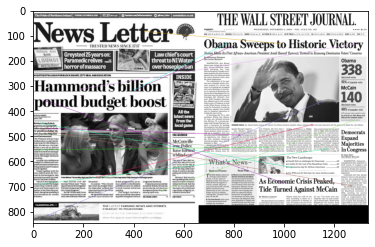

In [4]:
# Imports
import cv2 as cv
import matplotlib.pyplot as plt

# Open and convert the input and training-set image from BGR to GRAYSCALE
image1 = cv.imread(filename = 'image1.jpg',
                   flags = cv.IMREAD_GRAYSCALE)

image2 = cv.imread(filename = 'image2.jpg',
                   flags = cv.IMREAD_GRAYSCALE)
# Initiate BRISK descriptor
BRISK = cv.BRISK_create()

# Find the keypoints and compute the descriptors for input and training-set image
keypoints1, descriptors1 = BRISK.detectAndCompute(image1, None)
keypoints2, descriptors2 = BRISK.detectAndCompute(image2, None)
# create BFMatcher object
BFMatcher = cv.BFMatcher(normType = cv.NORM_HAMMING,
                         crossCheck = True)

# Matching descriptor vectors using Brute Force Matcher
matches = BFMatcher.match(queryDescriptors = descriptors1,
                          trainDescriptors = descriptors2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x: x.distance)

# Draw first 15 matches
output = cv.drawMatches(img1 = image1,
                        keypoints1 = keypoints1,
                        img2 = image2,
                        keypoints2 = keypoints2,
                        matches1to2 = matches[:15],
                        outImg = None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(output)
plt.show()